#**AQI**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [13]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [19]:
df.dropna(inplace = True)

In [20]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [21]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [88]:
df['PM2.5'].unique()

array([81.4 , 78.32, 88.76, ...,  7.63, 24.38, 16.64])

In [22]:
df['AQI'].unique()

array([184., 197., 198., 188., 173., 165., 191., 227., 168., 201., 252.,
       310., 196., 132., 147., 179., 145., 115., 140., 156., 225., 251.,
       228., 223., 170., 159., 232., 242., 274., 259., 177., 120., 136.,
       182., 222., 230., 224., 217., 229., 235., 214., 186., 172., 138.,
       125., 111., 137., 160., 163., 139., 176., 162., 142., 134., 130.,
       117., 102., 108.,  99., 121.,  86.,  57., 107., 118., 110., 114.,
        87.,  89.,  97., 100., 105., 116.,  92.,  80.,  88.,  83.,  81.,
       112., 113.,  78.,  69.,  60.,  61.,  90.,  74.,  76.,  93.,  79.,
        62.,  55.,  56.,  59.,  52., 103., 129., 155.,  68.,  65.,  66.,
        96.,  70.,  75.,  73.,  85.,  31.,  39.,  42., 106.,  71.,  47.,
        48.,  49.,  63.,  53.,  98., 154.,  91.,  77., 122., 133., 144.,
       189., 190., 215., 266., 276., 218., 180., 199., 221., 119., 153.,
       202., 183., 210., 304., 312., 306., 302., 298., 270., 257., 212.,
       256., 301., 262., 287., 143., 141., 150., 17

<Axes: xlabel='AQI', ylabel='Count'>

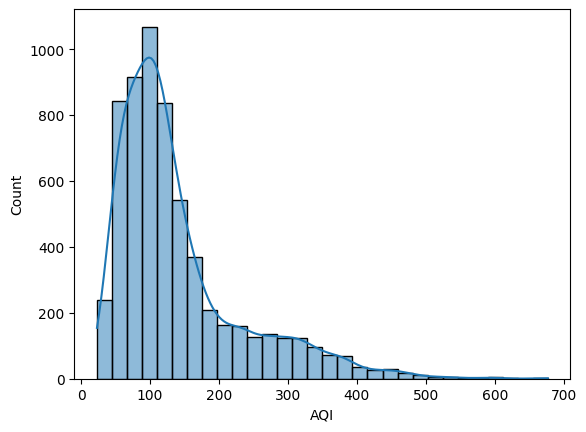

In [24]:
sns.histplot(x = 'AQI', data = df, kde = True, bins = 30)

In [25]:
df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

<Axes: xlabel='AQI_Bucket', ylabel='count'>

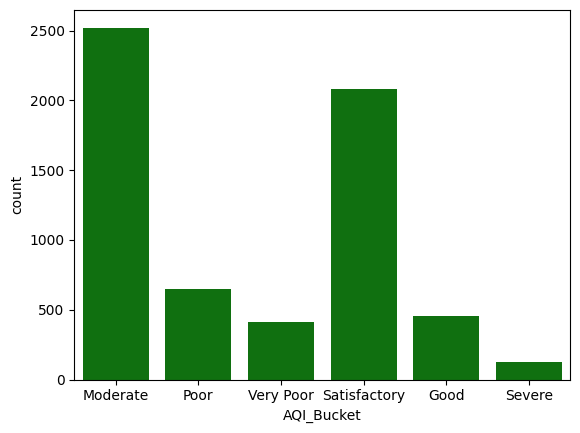

In [27]:
sns.countplot(x = 'AQI_Bucket', data = df, color ='green')

<Axes: xlabel='AQI_Bucket', ylabel='City'>

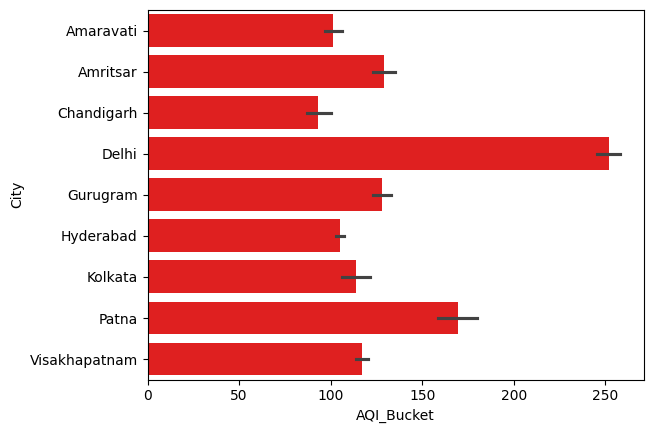

In [82]:
sns.barplot(x = 'AQI_Bucket', y = 'City', data = df, color = 'red')

In [28]:
df['Date'].unique()

array(['2017-11-25', '2017-11-26', '2017-11-27', ..., '2017-02-11',
       '2017-02-12', '2017-02-13'], dtype=object)

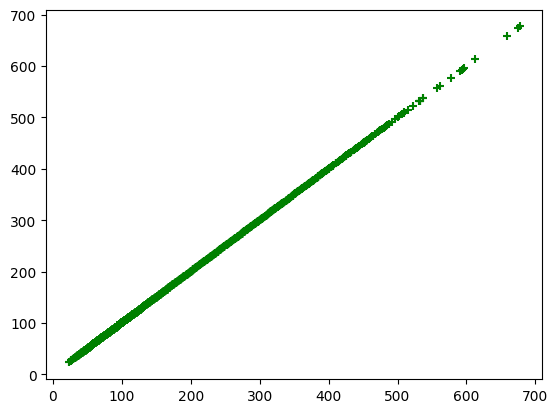

In [64]:
plt.scatter(df['AQI_Bucket'], df['AQI'], marker = '+', color = 'green')

In [102]:
df['AQI_Bucket'] = pd.to_numeric(df['AQI'], errors = 'coerce')
df['AQI_Bucket']

,AQI_Bucket
2123,184.0
2124,197.0
2125,198.0
2126,188.0
2127,173.0
...,...
29525,47.0
29526,41.0
29527,70.0
29528,68.0


In [60]:
line = LinearRegression()
line.fit(df[['AQI']],df['AQI_Bucket'])

LinearRegression()

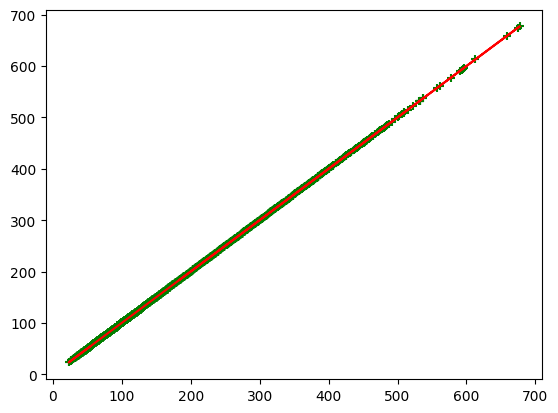

In [63]:
plt.scatter(df['AQI_Bucket'], df['AQI'], marker = '+', color = 'green')
plt.plot(df['AQI'], line.predict(df[['AQI']]), color = 'red')


<Figure size 1500x600 with 0 Axes>

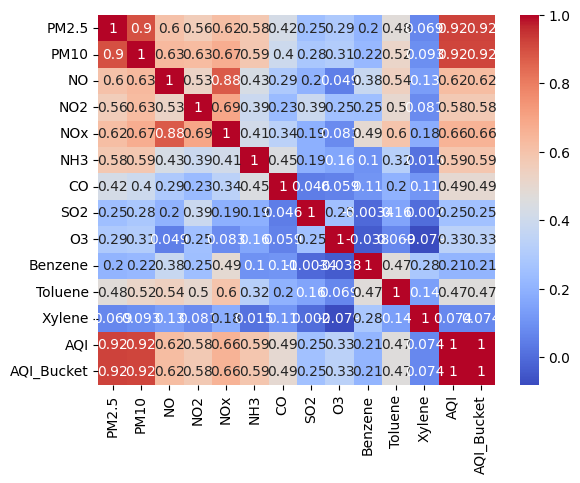

<Figure size 1500x600 with 0 Axes>

In [108]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(data = df_numeric.corr(), annot = True, cmap = 'coolwarm')
plt.figure(figsize = (15, 6))